In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import cvxpy as cp

from google.colab import drive
drive.mount('/content/drive')

print("python \t {}".format(".".join(map(str, sys.version_info[:3]))))
print("numpy \t {}".format(np.__version__))
print("pandas \t {}".format(pd.__version__))
print("cvxpy \t {}".format(cp.__version__))
print("seaborn \t {}".format(sns.__version__))
print("matplotlib \t {}".format(matplotlib.__version__))
print("pandas-datareader {}".format(pdr.__version__))

Mounted at /content/drive
python 	 3.10.12
numpy 	 1.23.5
pandas 	 1.5.3
cvxpy 	 1.3.2
seaborn 	 0.12.2
matplotlib 	 3.7.1
pandas-datareader 0.10.0


In [ ]:
os.getcwd()

'/content'

## <a href="https://www.barrons.com/articles/no-your-etf-doesnt-track-the-vix-volatility-index-and-here-are-the-numbers-1403010972">ETFs and the VIX - A Problem</a>
<br>
<font size="+1">
    <ul>
        <li>Thanks to the CBOE, all participants in the global economy have a benchmark (full of idiosyncratic flaws) that can be used, for better or worse, as a guage for U.S. stock market uncertainty.</li>
        <br>
        <li>This metric can serve as one data point for businesses when making operational decisions that affect a company's balance sheet.</li>
        <br>
        <li>The VIX index, like all indices, is just a number and not a security that can be bought or sold.</li>
        <br>
        <li>Regardless of the reason (speculation or hedging) there is a demand for exposure to the VIX index.</li>
        <br>
        <li>From the product management viewpoint, this presents a problem regarding the <b>how</b> component of creating a product that best suits the demand of clients.</li>
        <br>
        <li>Futures and options on the VIX were created, and these products continue to satisfy many groups of customers.</li>
        <br>
        <li>However, they are a bit <i>clunky</i> since these products have an expiration date and have to be <i><a href="https://www.investopedia.com/terms/r/rollforward.asp">rolled forward</a></i> if a client wanted indefinite exposure to or hedging against this index.</li>
        <br>
        <li>In order to produce a product that makes trading the VIX index more seamless, asset managers started to create <a href="https://en.wikipedia.org/wiki/Exchange-traded_fund">ETFs</a> and <a href="https://en.wikipedia.org/wiki/Exchange-traded_note">ETNs</a>, commonly composed of VIX futures, that were intended to track the VIX index.</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li>The goal was to produce a product analogous to what SPY does for the S&P 500 Index, for the VIX index.</li>
        <br>
        <font color="red"><li style="color:red">It turns out this hasn't been such an easy task!</li></font>
        <br>
        <ul style="color:red">
            <font color="red"><li>That is, to produce a product that tracks the VIX index, with a similar quality of tracking that SPY has done for the S&P 500 index, turns out to be difficult!</li></font>
        <br>
        </ul>
        <font color="blue"><li style="color:blue">In 2014, Brendan Conway wrote an opinion piece in Barron's highlighting the failure of ETFs to successfully track the VIX index:</li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li><i>"The idea of owning assets whose prices gain when stocks drop has plenty of allure. Just don't think buy-and-hold investors can do it using exchange-traded funds and similar trading vehicles tied to market volatility. Volatility or VIX ETFs and ETNs are built to track futures-market indices. <br><br> Those products' long-term returns deviate notably from the CBOE Volatility Index itself, with prices which have fallen 90% or more over their lifetimes -- a contrast to the VIX index, which is mean-reverting. Even over short horizons, there's plenty of variability. <br><br> Specifically, this means that just capturing a short-term market move with these funds and notes is challenging. The most closely linked ETFs and ETNs move in the same direction as the VIX index on fewer than five of every six market moves.<br><br> If you stretch your horizon out to 21 days and it's a one-in-five chance of a contrary move. The closest correlation over the longer period is 85%. That's what ProShares Ultra VIX Short-Term Futures ETF (UVXY) gets you.<br><br>  iPath S&P 500 VIX Short-Term Futures ETN (VXX) clocks in at 84% while ProShares VIX Short-Term Futures ETF (VIXY) and VelocityShares VIX Short Term ETN (VIIX) manage 83%.<br><br> So, you can be right above the move in market volatility, which is difficult enough -- and still fail in your ETF/ETN trade. <br><br> The 'term' of a VIX fund and your expectation for the direction of 'future' moves in volatility is crucial in selecting a fund."</i></li></font>
        <br>
        </ul>
        <br>
        <li>As mentioned in the article, the <a href="https://finance.yahoo.com/quote/VXX/">VXX</a> is a popular <a href="https://en.wikipedia.org/wiki/Exchange-traded_note">ETN</a> that tracks the VIX index using one-month VIX futures.</li>
        <br>
        <ul>
            <li><a href="https://www.etf.com/VXXB#overview">VXX</a> is managed by <a href="https://ipathetn.barclays/home.app">Barclays</a> as part of a suite of products in the the iPath ETNs series. Note the iPath ETNs are senior, unsecured debt securities of Barclays Bank PLC.</li>
            <br>
        </ul>
        <font color="red"><li style="color:red"><b>Our goal is to attempt to create a product (ETF) that replicates the VIX index using any combination of tradable securities including</b></li></font>
        <br>
        <ul style="color:red">
            <font color="red"><li>other ETFs,</li>
            <br>
            <li>single stocks,</li>
            <br>
            <li>VIX futures,</li>
            <br>
            <li>etc.</li></font>
            <br>
        </ul>
    </ul>
</font>

$\square$

# Data

## Yahoo! Finance
<br>
<font size="+1">
    <ul>
        <li>We will use a Python package called <a href="https://pandas-datareader.readthedocs.io/en/latest/">Pandas Data Reader</a> to quickly scrape data from Yahoo! Finance.</li>
        <br>
        <li>Pandas Data Reader has additional interesting functionality that is worth checking out, if interested.</li>
        <br>
    </ul>
</font>

In [ ]:
! pip install pandas-datareader

In [ ]:
##### Imports

import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cvxpy as cp

## S&P 500 and the VIX
<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for the VIX index as well as the S&P 500 ETF (SPY).</li>
        <br>
        <ul>
            <font color="green"><li style="color:green">It would be a good idea to write a function that allows us to grab any ticker we want from Yahoo! Finance and return a merged data frame consisting of adjusted closing prices and single period close-to-close returns, for each ticker.</li></font>
            <br>
        </ul>
        <li>We will see, empirically, one particular benefit of being able to have a tradable asset that replicates the VIX, which motivates the need for developing such a product.</li>
        <br>
    </ul>
</font>

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
import datetime


spy = yf.download('SPY', start='1980-09-10', end=datetime.date.today())

vix = yf.download('^VIX', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.840679,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.017355,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.070360,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.335373,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.441378,531500


<Axes: xlabel='Date'>

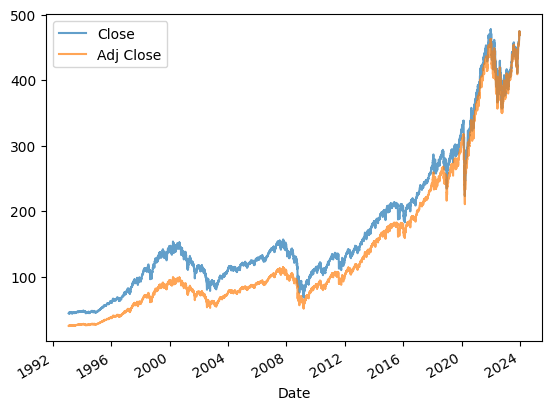

In [ ]:
# Plot the difference between SPY's close and adjusted closing prices
spy[['Close', 'Adj Close']].plot(alpha=0.7)

<Axes: xlabel='Date'>

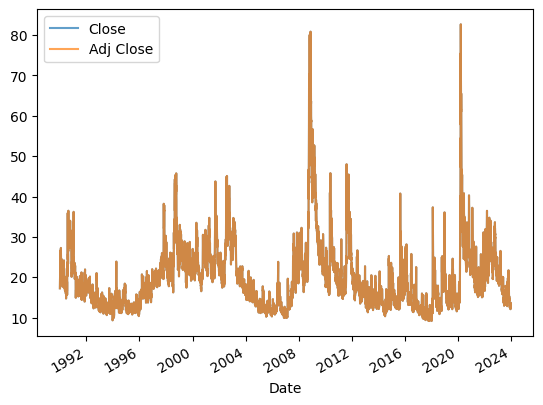

In [ ]:
vix[['Close', 'Adj Close']].plot(alpha=0.7)

<br>
<font size="+1">
    <ul>
        <li>There is a difference between the <b>closing price</b> and the <b>adjusted closing price</b> (<a href="https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.">described by Yahoo! Finance</a>).</li>
        <br>
        <ul>
            <li>The closing price is simply the cash value of that specific piece of stock at day's end while the adjusted closing price reflects the closing price of the stock in relation to other stock attributes.</li>
            <br>
            <li>In general, the adjusted closing price is considered to be a more technically accurate reflection of the true value of the stock.</li>
            <br>
            <li>The closing price of a stock is only its cash value at day's end, whereas the adjusted closing price factors in things like dividends, stock splits and new stock offerings.</li>
            <br>
            <li>For more, see <a href="https://finance.zacks.com/impact-stock-splits-total-stockholders-equity-3325.html">here.</a></li>
            <br>
        </ul>
    </ul>
</font>

### Prices and Returns from Yahoo! Finance
<br>
<font size="+1">
    <ul>
        <li>The data, reported after closing (4pm ET), contains prices stamped at various times throughout the day ($t$):
        $$
        P^{open}_t, P^{high}_t, P^{low}_t, P^{close}_t,
        $$
        as well as a measure of volume ($V_t$) and a closing price that is adjusted for various corporate actions $$P^{adj -close}_t.$$</li>
        <br>
        <li>Note, the <b>return</b> of a security can be defined as the percentage change of the security's price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}},$$ where $P_{i,t}$ is the price of security $i$ at time $t$.</li>
        <br>
        <li>Additionally, we can make a very crude estimate of the expected return of a security by taking the sample average of a time series of returns $$\mathbb{E}[r_{i,t}] \approx \frac{1}{T}\sum_{j=0}^{T-1} r_{i, t-j} \ .$$</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
# Create a data frame for daily returns

spy_vix_returns = pd.DataFrame()

spy_vix_returns['SPY_ret'] = (spy.loc[:, 'Adj Close'] / spy.loc[:, 'Adj Close'].shift()) - 1

spy_vix_returns['VIX_ret'] = (vix.loc[:, 'Adj Close'] / vix.loc[:, 'Adj Close'].shift()) - 1

In [ ]:
# Create a portfolio that does a daily rebalancing to ensure there is 90% SPY and 10% VIX portfolio weights
spy_vix_returns['(0.9SPY+0.1VIX)_ret'] = 0.9*spy_vix_returns['SPY_ret'] + 0.1*spy_vix_returns['VIX_ret']

In [ ]:
# (Arithmetic) Average of returns of the two portfolios
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].mean()

SPY_ret                0.000449
(0.9SPY+0.1VIX)_ret    0.000638
dtype: float64

In [ ]:
# Standard deviation of daily returns of the two portfolios
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].std()

SPY_ret                0.011827
(0.9SPY+0.1VIX)_ret    0.007541
dtype: float64

In [ ]:
# Sharpe ratio of the daily returns of the two portfolios
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].mean() / \
 spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].std()

SPY_ret                0.037959
(0.9SPY+0.1VIX)_ret    0.084625
dtype: float64

<br>
<font size="+1">
    <ul>
        <li>It is always a good idea to plot your data and see what you observe.</li>
        <br>
        <li style="color:blue">This is one area where the skills you have developed in DSO 545 and GSBA 545 can be deployed.</li>
        <br>
        <ul style="color:blue">
            <li>Summary statistics and hypothesis testing,</li>
            <br>
            <li>time series and histogram visualizations,</li>
            <br>
            <li>algorithmic exploratory data analysis - clustering, principal components or factor analysis, etc.,</li>
            <br>
            <li>etc.</li>
            <br>
        </ul>
    </ul>
</font>

<Axes: xlabel='Date'>

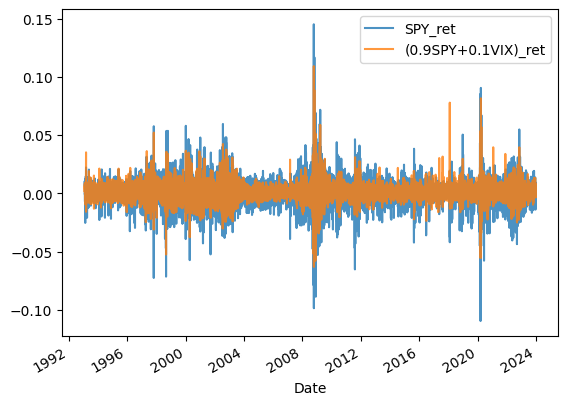

In [ ]:
# Plot a time series of the daily returns
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].plot(alpha=0.8)

<Axes: ylabel='Frequency'>

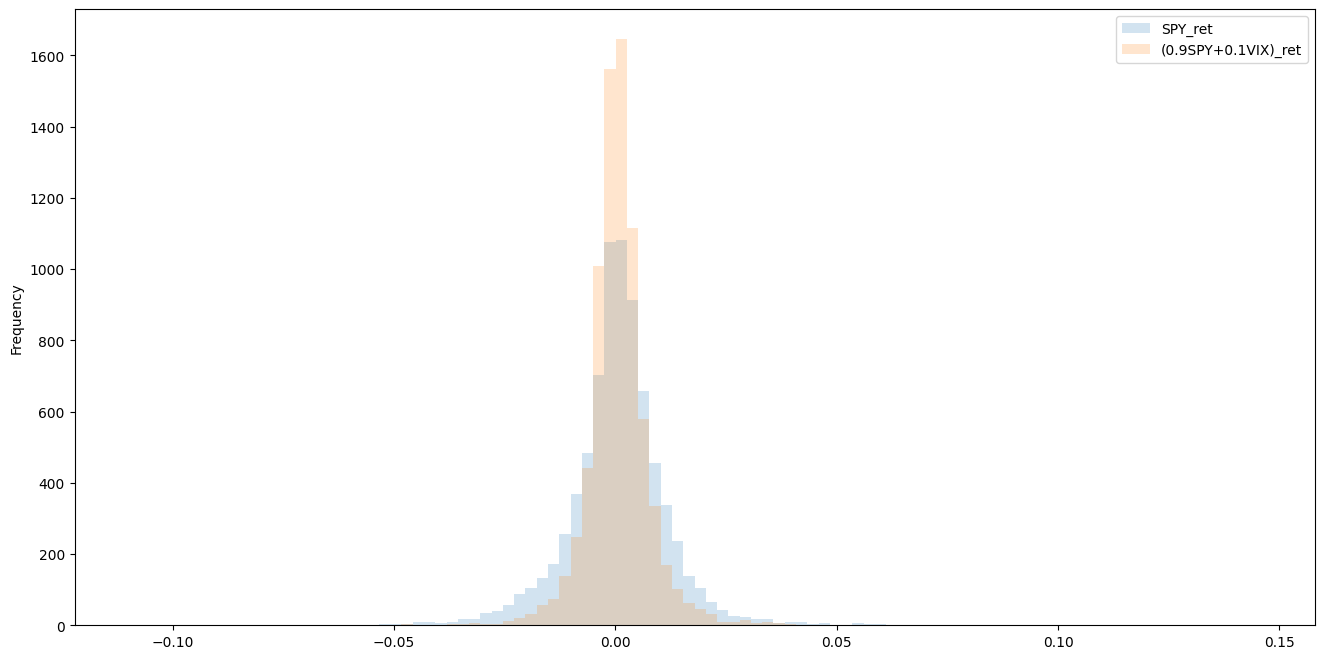

In [ ]:
# Plot a histogram of the daily returns
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].plot(kind='hist', bins=100, figsize=(16,8), alpha=0.2)

In [ ]:
portfolio = spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].copy()

In [ ]:
portfolio.dropna(inplace=True)

<Axes: xlabel='Date'>

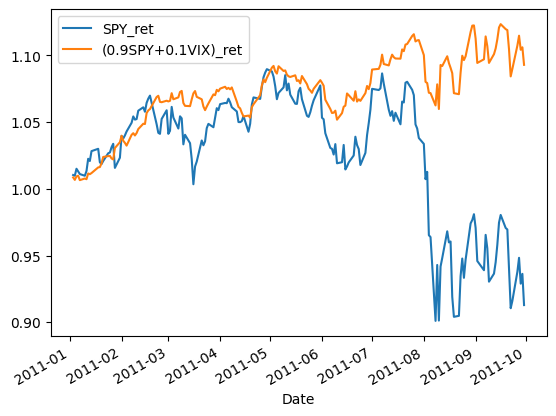

In [ ]:
# Period where US suffered credit rating downgrade by Standard and Poor's

(portfolio+1).loc['2011-01':'2011-09'].cumprod().plot()

<Axes: xlabel='Date'>

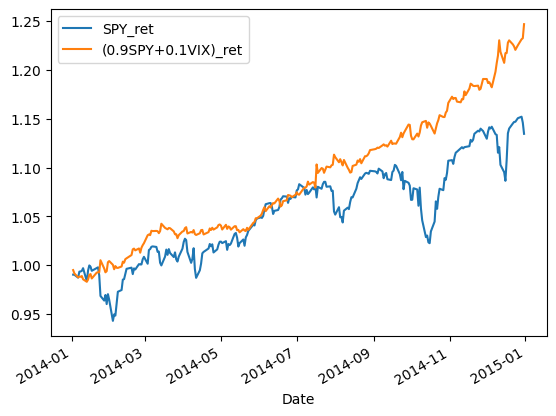

In [ ]:
(portfolio+1).loc['2014-01':'2014-12'].cumprod().plot()

<Axes: xlabel='Date'>

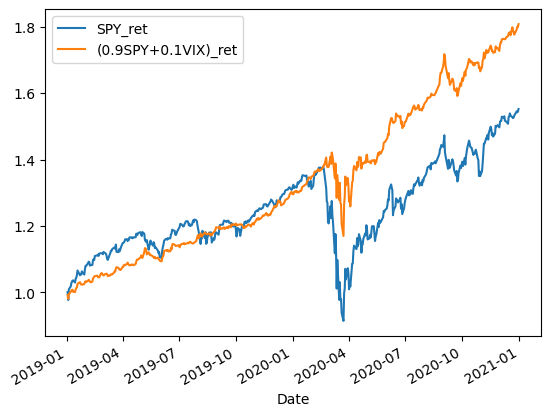

In [ ]:
(portfolio+1).loc['2019-01':'2020-12'].cumprod().plot()

<Axes: xlabel='Date'>

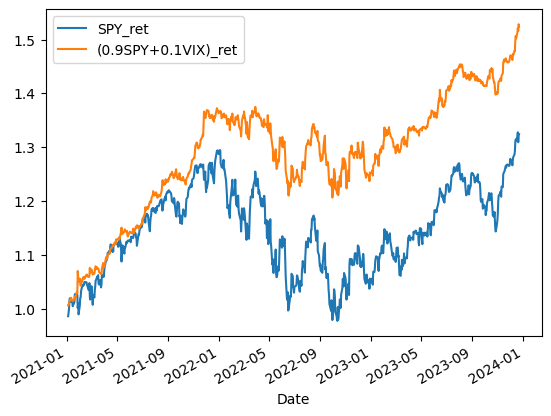

In [ ]:
(portfolio+1).loc['2021-01':].cumprod().plot()

<Axes: xlabel='Date'>

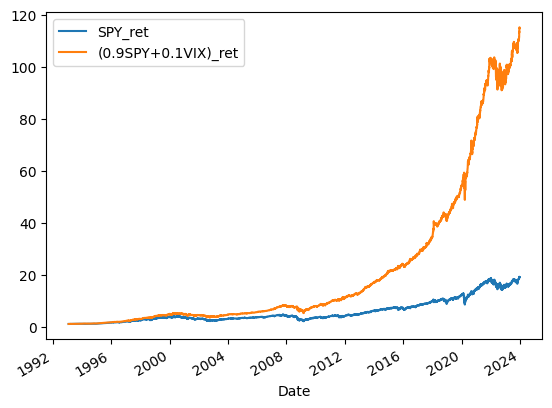

In [ ]:
# Plot the Gross Return of SPY and the SPY-VIX daily rebalanced portfolio for the full sample

(portfolio+1).cumprod().plot()

## Tradeable VIX-like Products
<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for the VIX, and its associated ETFs and ETNs that are supposed to benchmark to the VIX.</li>
        <br>
        <li>This will show us how the current existing products are failing to adequately replicate the VIX index.</li>
        <br>
    </ul>
</font>

In [ ]:
# VXXB = yf.download('VXXB', start='1980-09-10', end=datetime.date.today())|

In [ ]:
vix = yf.download('^VIX', start='1980-09-10', end=datetime.date.today())

# UVXY is one of the worst ETFs in terms of decay.
# If you buy and hold, you are likely to lose a lot.
# Your $28.00 stock was once worth $1.461 million adjusted for reverse stock splits.

uvxy = yf.download('UVXY', start='1980-09-10', end=datetime.date.today())

vxx = yf.download('VXX', start='1980-09-10', end=datetime.date.today())

vixy = yf.download('VIXY', start='1980-09-10', end=datetime.date.today())

# The ETNs are linked to the daily return of the index and do not represent an investment in the VIX.
viix = yf.download('VIIX', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# View a sample of the data
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [ ]:
vxx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-25,442.559998,442.559998,442.559998,442.559998,442.559998,0
2018-01-26,442.559998,442.559998,442.559998,442.559998,442.559998,0
2018-01-29,467.200012,473.279999,467.200012,473.279999,473.279999,88
2018-01-30,492.640015,508.959991,487.839996,488.799988,488.799988,3956
2018-01-31,479.359985,490.880005,479.359985,490.399994,490.399994,575


<Axes: xlabel='Date'>

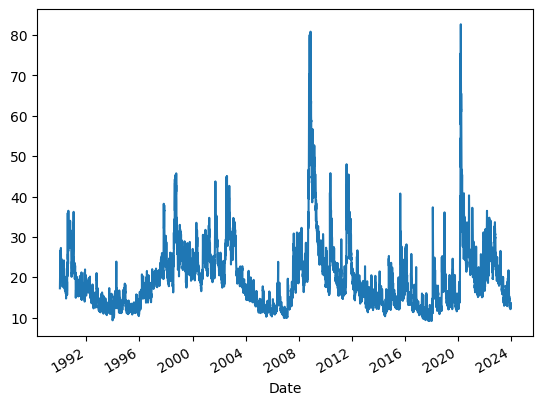

In [ ]:
# Plot the VIX
vix['Adj Close'].plot()

<Axes: xlabel='Date'>

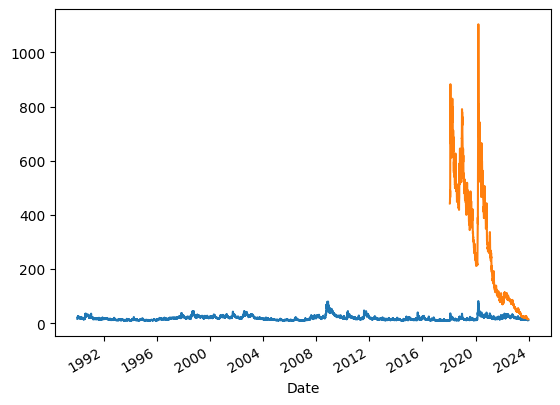

In [ ]:
# Plot the full sample of the LEVEL
vix['Adj Close'].plot()

vxx['Adj Close'].plot()

<Axes: xlabel='Date'>

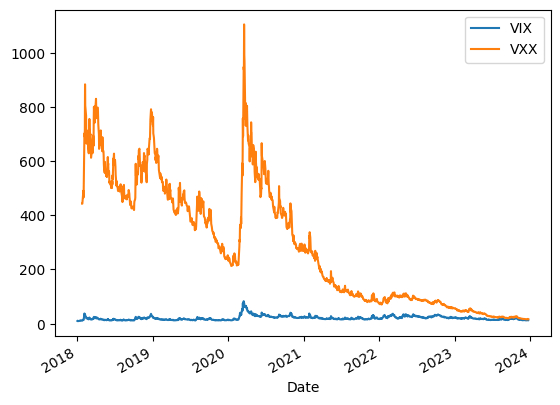

In [ ]:
# Plot a sub-sample of the LEVEL
vix['Adj Close'].loc['2018':].plot(legend=True, label='VIX')

vxx['Adj Close'].loc['2018':].plot(legend=True, label='VXX')

In [ ]:
# # Plot the VIX and the normalized VXX
# vix['Adj Close'].loc['2018':].plot(legend=True, label='VIX')

# # VXX is normalized by the inital value of VIX from the subsample
# (vxx['Adj Close'].loc['2018':]/vix['Adj Close'].loc['2018':].iloc[0]).plot(legend=True, label='VXX')

<Axes: xlabel='Date'>

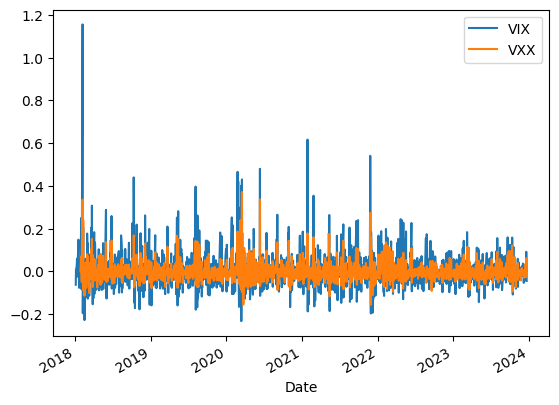

In [ ]:
# Plot a sub-sample of the RETURN
vix['Adj Close'].loc['2018':].pct_change().plot(legend=True, label='VIX')

vxx['Adj Close'].loc['2018':].pct_change().plot(legend=True, label='VXX')

<br>
<font size="+1">
    <ul>
        <li>We will do further sub-sample analysis to investigate the tracking quality of the VXX (in terms of both the level and percentage change of the VIX) during different time periods.</li>
        <br>
    </ul>
</font>

<Axes: xlabel='Date'>

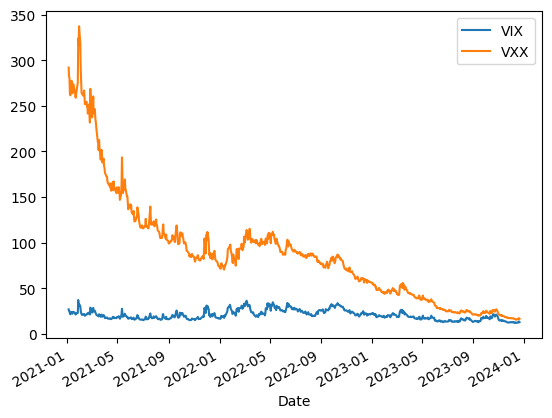

In [ ]:
# Plot a different sub-sample of the LEVEL
vix['Adj Close'].loc['2021':].plot(legend=True, label='VIX')

vxx['Adj Close'].loc['2021':].plot(legend=True, label='VXX')

<Axes: xlabel='Date'>

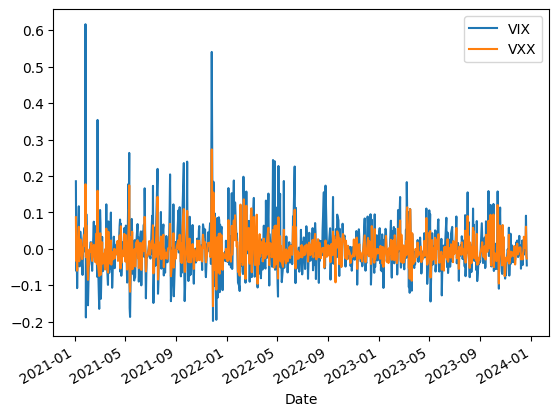

In [ ]:
# Plot a different sub-sample of the RETURN
vix['Adj Close'].pct_change().loc['2021':].plot(legend=True, label='VIX')

vxx['Adj Close'].pct_change().loc['2021':].plot(legend=True, label='VXX')

<br>
<font size="+1">
    <ul>
        <li>How can we attempt to find a better alternative?</li>
        <br>
    </ul>
</font>

## <a href="https://www.cboe.com/tradable_products/vix/vix_historical_data/">CBOE Historical Data</a>
<br>
<font size="+1">
    <ul>
        <li><a href="https://www.cboe.com/us/futures/market_statistics/historical_data/">CBOE Futures Historical Data</a></li>
        <br>
        <li><a href="https://www.cboe.com/tradable_products/vix/vix_futures/specifications/">CBOE VIX Futures contract specifications</a></li>
        <br>
        <li><a href="https://www.cboe.com/us/futures/market_statistics/historical_data/archive/">CBOE VIX products historical archived data</a></li>
        <br>
    </ul>
</font>

<a href="https://www.amazon.com/Active-Portfolio-Management-Quantitative-Controlling/dp/0070248826"><img src="https://m.media-amazon.com/images/I/41wADnIW1jL._AC_SY780_.jpg" width="250"></a>

# Portfolio Management Relative To a Benchmark
<br>
<font size="+1">
    <ul>
        <li>In an investment portfolio, the <i>security selection</i> problem is concerned with determining the holdings of specific securities within a given <i>investable universe</i>.</li>
        <br>
        <li>It is customary to manage and evaluate the portfolio of securities <b>relative</b> to some predefined <b>benchmark portfolio</b> that represents a particular investable universe.</li>
        <br>
        <li>The <b>benchmark portfolio</b> provides a reference point for the construction of a portfolio.</li>
        <br>
        <li>The management of a portfolio of securities relative to a benchmark could be <i>passive</i> or <i>active</i>.</li>
        <br>
        <li>The goal of <i>passive</i> security portfolio management is to <b>replicate</b> the benchmark and the goal of the <i>active</i> security portfolio management is to <b>beat</b> the benchmark.</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <font color="blue"><li style="color:blue">Our goal is to create a <i>passive</i> portfolio that adequately tracks the VIX index (as opposed to an <i>active</i> portfolio that trys to beat the VIX index) using only <i>primitive</i> securities, such as stocks, (as opposed to futures or other derivatives).</li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>This is a very vague objective!</li>
            <br>
            <li>Our task is to <b>quantify</b> this goal.</li></font>
            <br>
        </ul>
    </ul>
</font>

$\square$

## What's the Investable Universe?
<br>
<font size="+1">
    <ul>
        <li>The <b>investable universe</b> is the collection of all tradable assets (stocks, bonds, futures, options, etc.) that are going to make up our portfolio that is designed to track the benchmark.</li>
        <br>
        <li>Our formulation will crucially depend on how the tracking portfolio's investable universe compares to the benchmark's investable universe.</li>
        <br>
        <li>In general, the benchmark does not need to be constructed from an universe of investable securities, it is simply a number that represents some quantity.</li>
        <br>
        <li>In particular, assume we want to construct a portfolio from an investable universe of \begin{equation}n\end{equation} securities with percentage holdings
        \begin{equation}
        \bar{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n\end{bmatrix}.
        \end{equation}</li>
        <br>
    </ul>
</font>

$\square$

## Active Management Formulation
<br>
<font size="+1">
    <ul>
        <li>Recall:</li>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>We can define a return as the relative price change, or growth rate, of the share price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}$$</li>
            <br>
            <li>Fix a point in time $t$, and drop the time subscript from the returns.</li>
            <br>
            <li>We can define a portfolio as a linear combination of individual securities' returns $$r_p = w_1 r_1 + w_2 r_2 + \cdots w_n r_n = \bar{w}^T \bar{r}, $$ where $n$ is the total number of securities in your investable universe and $w_i$ is the percentage of your capital that you want to invest in the $i^{th}$ security.</li>
            <br>
            <li>The expected rate of return of the portfolio is given by $$\mathbb{E}[r_p] = \sum_{i=1}^n w_i \mathbb{E}[r_i] = \bar{w}^T \bar{\mu},$$ where $\bar{w}$ is the vector of weights and $\bar{\mu}$ is vector of expected returns.</li></font>
            <br>
        </ul>
        <font color="red"><li style="color:red"><b>Assume the benchmark is constructed from the same investable universe as your managed portfolio.</b></li></font>
        <br>
        <li>Consider a benchmark with returns $$r_b = w^b_1 r_1 + w^b_2 r_2 + \cdots w^b_n r_n = \bar{w_b}^T \bar{r}.$$</li>
        <br>
        <li>Then the difference between the portfolio return and the benchmark return $$r_p - r_b =  \bar{w_b}^T \bar{r} - \bar{w_b}^T \bar{r} = (\bar{w} - \bar{w_b})^T \bar{r}$$ is known as the <b>active return</b>, which is the return relative to the benchmark portfolio.</li>
        <br>
        <li>The vector $$\bar{w} - \bar{w_b}$$ is known as the <b>active holdings</b> of the portfolio.</li>
        <br>
        <li>If we assume the variance to be our measure of <i>risk</i>, then we can consider the variance of the active return, known as <b>active risk</b> or <b>tracking error</b> $$Var(r_p - r_b)= Var((\bar{w} - \bar{w_b})^T \bar{r}) = \sum_{i=1}^n \sum_{j=1}^n (w_i - w_i^b) (w_j - w_j^b) Cov(r_i, r_j)$$ $$\Updownarrow$$ $$Var(r_b - r_p) = Var((\bar{w} - \bar{w_b})^T \bar{r}) = (\bar{w}-\bar{w_b})^T \Sigma (\bar{w}-\bar{w_b}),$$ where $(\bar{w}-\bar{w_b})$ is the vector of active weights and $\Sigma$ is the matrix of covariances of returns.</li>
        <br>
        <font color="blue"><li style="color:blue">\begin{equation} Var(r_b - r_p) = Var((\bar{w} - \bar{w_b})^T \bar{r}) = (\bar{w}-\bar{w_b})^T \Sigma (\bar{w}-\bar{w_b}) =
        \underbrace{\begin{bmatrix}
        w_1 - w_1^b & w_2 - w_2^b & \cdots & w_n - w_n^b \\
        \end{bmatrix}}_{\underbrace{(\bar{w} - \bar{w_b})^T}_{(1\times n)}}
        \underbrace{\begin{bmatrix}
Cov(r_1,r_1) & Cov(r_1, r_2) & \cdots & Cov(r_1, r_n)\\
\vdots & \vdots & \cdots & \vdots \\
Cov(r_n, r_1) & Cov(r_n, r_2) & \vdots & Cov(r_n, r_n) \\
            \end{bmatrix}}_{\underbrace{\Sigma}_{(n\times n)}}
            \underbrace{\begin{bmatrix}
        w_1 - w_1^b \\ w_2 - w_2^b \\ \vdots \\ w_n - w_n^b \\
        \end{bmatrix}}_{\underbrace{(\bar{w} - \bar{w_b})}_{(n\times 1)}}\end{equation}</li></font>
        <br>
        <font color="green"><li style="color:green">We can construct a wide range of goals and constraints to achieve a portfolio replication that satisfies active return and tracking error goals and constraints.</li>
        <br>
        <li style="color:green">Be aware that different formulations have different qualities of solutions, so additional experimentation will be warranted.</li>
        <br>
        <li style="color:green">Also, what if your benchmark isn't constructed from the same set of investable securities that you want to use to form your managed portfolio? </li>
        <br>
        <li style="color:green">What if your benchmark isn't constructed from any set investable securities?</li>
        <br>
        <li style="color:green"><b>We need a reformulation!</b></li></font>
        <br>
    </ul>
</font>

$\square$

## <a href="https://www.cvxpy.org/examples/basic/least_squares.html">Least Squares Formulation</a>
<br>
<font size="+1">
    <ul>
        <font color="red"><li style="color:red"><b>Assume the benchmark is NOT constructed from the same investable universe as your managed portfolio.</b></li></font>
        <br>
        <font color="red"><li style="color:red"><b>In particular, assume the benchmark is just a number that we want to track.</b></li></font>
        <br>
        <li>One (non-unique) way of interpreting this vague objective is by <i>determining</i> a portfolio whose value is <i>close</i> to the benchmark that we want to track.</li>
        <br>
        <ul>
            <li>How do you <i>determine</i> a portfolio?</li>
            <br>
            <li>How do you stay <i>close</i> to a benchmark?</li>
            <br>
            <li>How do you measure <i>closeness</i>?</li>
            <br>
        </ul>
        <li>The answers to these questions are entirely in our creative control!</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li>Assume we are trying to track the returns to the VIX (our benchmark), which we can denote as $r_b$, with some portfolio with returns $r_p$, for all time $t$.</li>
        <br>
        <li>We decide to measure closeness between the tracker and benchmark portfolios as the daily sum of squared errors \begin{equation} SSE(r_p, r_b) = \sum_{t=1}^T (r_{p, t} - r_{b, t})^2 = \cdots = ||r_p - r_b||_2^2 = \cdots = ||R\bar{w} - r_b||_2^2 ,\end{equation} where \begin{equation}R = \begin{bmatrix}r_{1,1} & r_{1,2} & \cdots & r_{1,n} \\
        r_{2,1} & r_{2,2} & \cdots & r_{2,n} \\
        \vdots & \vdots & \cdots & \vdots \\
        r_{T,1} & r_{T,2} & \cdots & r_{T,n} \\
        \end{bmatrix}_{ \ (\text{time} \times \text{assets})}.\end{equation} is the matrix (table) of historical returns of all assets in the tracking portfolio's investable universe.</li>
        <br>
        <li>Every column in $R$ represents the history of a particular asset $i$, and every row in $R$ represents the cross-section of asset returns at a particular time $t$.</li>
        <br>
        <font color="green"><li style="color:green">This formulation allows us to track a number using any investable universe, or set of securities, we want!</li></font>
        <br>
    </ul>
</font>

$\square$

# Constructing a Volatility Index Tracking Fund
<br>
<font size="+1">
    <ul>
        <li>As mentioned before, this is a real problem that has been studied from various angles.</li>
        <br>
        <li>Two such angles are: <a href="https://arxiv.org/pdf/1907.00293.pdf">Tracking VIX with VIX Futures: Portfolio Construction and Performance</a>, and <a href="https://www.dallasfed.org/~/media/documents/banking/occasional/1401.pdf">Constructing Zero-Beta VIX Portfolios
with Dynamic CAPM</a>.</li>
        <br>
        <li>We will be taking a less technical and more experimental approach, which should cause us to have low expectations of success; however, our approach can be iterated upon and extended in many ways.</li>
        <br>
        <font color="red"><li style="color:red">This problem gives a playground to apply all fields of analytics from the descriptive, to the predictive, and finally to the prescriptive!</li></font>
        <br>
    </ul>
</font>

## Tracking the VIX with an Investable Universe
<br>
<font size="+1">
    <ul>
        <li>We have to answer the following question:</li>
        <br>
        <ul>
            <li><b>What products do we want to manage to track the VIX index?</b></li>
            <br>
        </ul>
        <li>Answering this question requires a lot of data analysis, as well as some domain knowledge.</li>
        <br>
        <li>In the interest of time, we will look at a small subset of securities that we hope will have some signal.</li>
        <br>
    </ul>
</font>

### Tracking the VIX with Futures
<br>
<font size="+1">
    <ul>
        <li>The universe of futures would be a very good starting point, however, they are a more complicated product that requires more advanced data wrangling techniques.</li>
        <br>
        <li>If you are up for the challenge, feel free to use these products as part of your investable universe!</li>
        <br>
        <ul>
            <li>I have downloaded data on these products from the CBOE, and have placed the files on the Google drive.</li>
            <br>
        </ul>
    </ul>
</font>

### Tracking the VIX with Negative Beta Stocks

In [ ]:
# https://www.suredividend.com/negative-beta-stocks/
# https://www.marketbeat.com/market-data/negative-beta-stocks/
# https://seekingalpha.com/news/3730901-inverse-qqq-etfs

<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for a few securities that we believe tend move in opposite directions as the S&P 500.</li>
        <br>
        <li>We hope these securities are related to the VIX.</li>
        <br>
    </ul>
</font>

In [ ]:
import datetime as dt

In [ ]:
# PSQ, SH, CLX, TORM

# ProShares Short QQQ ETF
psq = yf.download('PSQ', start='1980-09-10', end=datetime.date.today())

# ProShares Short S&P500 ETF
sh = yf.download('SH', start='1980-09-10', end=datetime.date.today())

# Clorox Co
clx = yf.download('CLX', start='1980-09-10', end=datetime.date.today())

# TORM is a world-leading specialist carrier of energy and clean petroleum products
torm = yf.download('TORM', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
psq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-21,274.480011,274.480011,274.480011,274.480011,221.982727,50
2006-06-22,276.519989,279.480011,276.519989,279.200012,225.800003,3650
2006-06-23,280.799988,280.799988,277.839996,279.160004,225.767685,4175
2006-06-26,279.239990,280.480011,278.760010,279.200012,225.800003,4050
2006-06-27,279.200012,284.799988,279.200012,284.600006,230.167252,15675


### Tracking the VIX with High Volatility Stocks

In [ ]:
# https://www.tradingview.com/markets/stocks-usa/market-movers-most-volatile/

<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for a few securities that we believe tend to move around a lot and have high volatility.</li>
        <br>
        <li>We hope these securities are related to the VIX.</li>
        <br>
    </ul>
</font>

In [ ]:
# AGBA, COMP, PIXY, VTYX

# AGBA Acquisition Ltd
agba = yf.download('AGBA', start='1980-09-10', end=datetime.date.today())

# Compass Inc
comp = yf.download('COMP', start='1980-09-10', end=datetime.date.today())

# ShiftPixy Inc
pixy = yf.download('PIXY', start='1980-09-10', end=datetime.date.today())

# Ventyx Biosciences, Inc.
vtyx = yf.download('VTYX', start='1980-09-10', end=datetime.date.today()) #PLXP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
agba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-31,9.9,9.9,9.9,9.9,9.9,400
2019-08-01,9.9,9.9,9.9,9.9,9.9,0
2019-08-02,10.0,10.0,10.0,10.0,10.0,100
2019-08-05,10.0,10.0,10.0,10.0,10.0,200
2019-08-06,10.0,10.0,10.0,10.0,10.0,0


### Tracking the VIX with High Correlation with VIX Stocks

In [ ]:
# https://www.businessinsider.com/investing-101-five-profitable-stocks-with-a-strong-vix-correlation-2011-9
# https://seekingalpha.com/article/823781-10-high-yield-dividend-stocks-with-positive-vix-correlation

<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for a few securities that we believe tend move in the same directions as the VIX index.</li>
        <br>
        <li>We hope these securities are related to the VIX.</li>
        <br>
    </ul>
</font>

In [ ]:
# DG, GME, MCY, KR

# Dollar General
dg = yf.download('DG', start='1980-09-10', end=datetime.date.today())

# GameStop Corp.
gme = yf.download('GME', start='1980-09-10', end=datetime.date.today())

# Mercury General Corp
mcy = yf.download('MCY', start='1980-09-10', end=datetime.date.today())

# # Credit Suisse Group AG
# cs = yf.download('CS', start='1980-09-10', end=datetime.date.today())

# Kroger
kr = yf.download('KR', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
kr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-09-10,1.304688,1.351563,1.304688,1.335938,0.118091,265600
1980-09-11,1.335938,1.343750,1.312500,1.312500,0.116020,340800
1980-09-12,1.312500,1.328125,1.296875,1.328125,0.117401,108800
1980-09-15,1.328125,1.328125,1.296875,1.312500,0.116020,611200
1980-09-16,1.312500,1.367188,1.312500,1.367188,0.120854,334400



### Constructing the Investable Universe Returns Data Set
<br>
<font size="+1">
    <ul>
        <li>\begin{equation}R\end{equation} is the matrix (table) of historical returns of all assets in the tracking portfolio's investable universe, that is:
        \begin{equation}R = \begin{bmatrix}r_{1,1} & r_{1,2} & \cdots & r_{1,n} \\
        r_{2,1} & r_{2,2} & \cdots & r_{2,n} \\
        \vdots & \vdots & \cdots & \vdots \\
        r_{T,1} & r_{T,2} & \cdots & r_{T,n} \\
        \end{bmatrix}_{ \ (\text{time} \times \text{assets})}.\end{equation}</li>
        <br>
        <li>Every column in $R$ represents the history of a particular asset $i$, and every row in $R$ represents the cross-section of asset returns at a particular time $t$.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
today = datetime.date.today()

two_years_ago = today - datetime.timedelta(2*365)

In [ ]:
returns = pd.DataFrame({'cash':0}, index=pd.date_range('1980-09-10', today, freq='b'))

ticker_symbols = ['PSQ', 'SH', 'CLX', 'TORM',
                 'AGBA', 'COMP', 'PIXY', 'VTYX',
                 'DG', 'GME', 'MCY', 'KR',
                 'VIX']

ticker_data = [psq, sh, clx, torm,
              agba, comp, pixy, vtyx,
              dg, gme, mcy, kr,
              vix]

for ticker, data in zip(ticker_symbols, ticker_data):
    returns[ticker+'_ret'] = data['Adj Close'].pct_change()

<br>
<font size="+1">
    <ul>
        <li>It is always a good idea to plot your data and see what you observe.</li>
        <br>
        <font color="blue"><li style="color:blue">This is one area where the skills you have developed in DSO 545 and GSBA 545 can be deployed.</li>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>Summary statistics and hypothesis testing,</li>
            <br>
            <li>time series and histogram visualizations,</li>
            <br>
            <li>algorithmic exploratory data analysis - clustering, principal components or factor analysis, etc.,</li>
            <br>
            <li>etc.</li></font>
            <br>
        </ul>
    </ul>
</font>

Text(0.5, 1.0, 'Daily Returns of Universe of Securities')

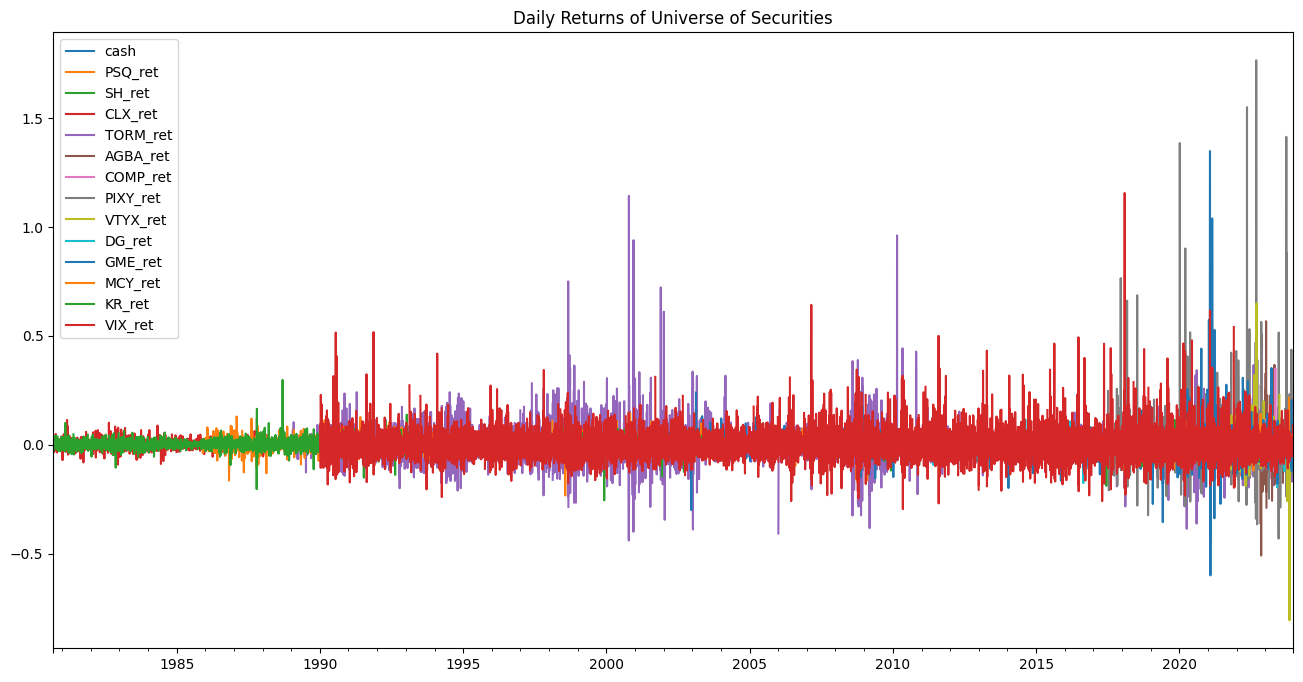

In [ ]:
returns.plot(figsize=(16,8), legend=True)

plt.title('Daily Returns of Universe of Securities')

<Axes: ylabel='Frequency'>

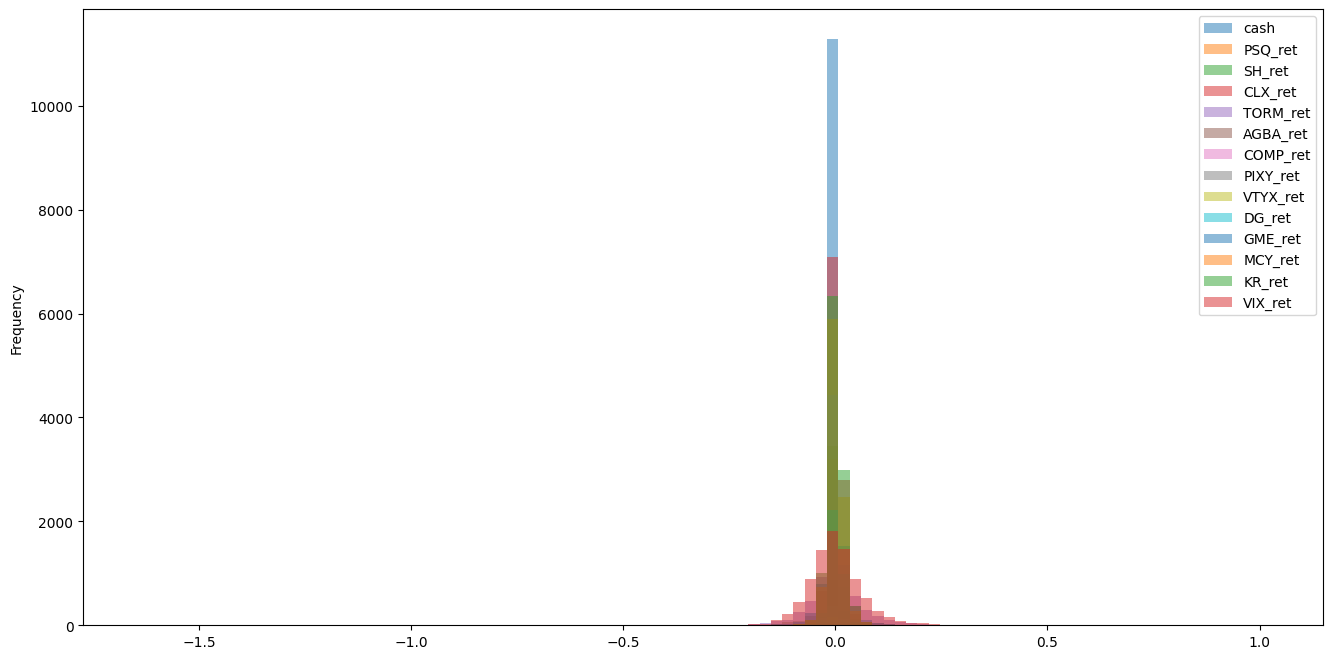

In [ ]:
np.log(returns+1).plot(kind='hist', bins=100, alpha=0.5, figsize=(16,8))

In [ ]:
mean_variance = pd.DataFrame({'Mean': returns.mean(),
                              'Volatility': returns.std()})

mean_variance

,Mean,Volatility
cash,0.000000,0.000000
PSQ_ret,-0.000617,0.014002
SH_ret,-0.000391,0.012526
CLX_ret,0.000657,0.016082
TORM_ret,0.001372,0.060585
AGBA_ret,-0.001443,0.053257
COMP_ret,-0.001066,0.055660
PIXY_ret,-0.001880,0.119122
VTYX_ret,-0.001018,0.067813
DG_ret,0.000666,0.016870


<br>
<font size="+1">
    <ul>
        <li>The see the expected return and variance of the three securities for a single day, as well as the cross-correlations between the securities.</li>
        <br>
        <font color="red"><li style="color:red">Recall, the correlation between two variables $(X_i, X_j)$ is defined as $$\rho_{X_i, X_j} = \frac{Cov(X_i, X_j)}{\sqrt{Var(X_i)} \ \sqrt{Var(X_j)}} \ , $$ and measures the extent to which the two variables <b>linearly</b> move together.</li></font>
        <br>
        <li>This is far from what you would use in practice, and there are so many ways to innovate on obtaining these estimates using analytics techniques, both old and new.</li>
        <br>
        <li>How might this change if we used different horizons?</li>
        <br>
        <li>How can you think of these estimates (pros and cons) and how they're going to be used from the different perspectives of</li>
        <br>
        <ul>
            <li>descriptive analytics,</li>
            <br>
            <li>predictive analytics,</li>
            <br>
            <li>prescriptive analytics,</li>
            <br>
            <li>and business development and strategy, as well as product management?</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

In [ ]:
corr_matrix = returns.corr()

corr_matrix

,cash,PSQ_ret,SH_ret,CLX_ret,TORM_ret,AGBA_ret,COMP_ret,PIXY_ret,VTYX_ret,DG_ret,GME_ret,MCY_ret,KR_ret,VIX_ret
cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSQ_ret,NaN,1.000000,0.917885,-0.344623,-0.061665,0.000739,-0.501448,-0.144313,-0.213843,-0.346991,-0.238610,-0.455229,-0.310568,0.691970
SH_ret,NaN,0.917885,1.000000,-0.394212,-0.069534,-0.002605,-0.495660,-0.118606,-0.220691,-0.375522,-0.247143,-0.565867,-0.367322,0.719637
CLX_ret,NaN,-0.344623,-0.394212,1.000000,0.011078,-0.021874,0.093988,0.001269,-0.000472,0.271565,0.140556,0.179533,0.207514,-0.239531
TORM_ret,NaN,-0.061665,-0.069534,0.011078,1.000000,0.001714,-0.032768,-0.023489,-0.036066,0.006648,0.025478,0.030770,0.033767,-0.064515
AGBA_ret,NaN,0.000739,-0.002605,-0.021874,0.001714,1.000000,0.042883,0.020337,0.039204,-0.021526,0.004585,-0.039606,0.026074,-0.059410
COMP_ret,NaN,-0.501448,-0.495660,0.093988,-0.032768,0.042883,1.000000,0.179064,0.184299,0.141954,0.336115,0.162331,0.068905,-0.338640
PIXY_ret,NaN,-0.144313,-0.118606,0.001269,-0.023489,0.020337,0.179064,1.000000,0.009811,0.025723,0.052255,0.035553,0.003694,-0.120460
VTYX_ret,NaN,-0.213843,-0.220691,-0.000472,-0.036066,0.039204,0.184299,0.009811,1.000000,0.033097,0.165036,0.013227,0.013303,-0.142401
DG_ret,NaN,-0.346991,-0.375522,0.271565,0.006648,-0.021526,0.141954,0.025723,0.033097,1.000000,0.077345,0.192942,0.300551,-0.283066


In [ ]:
covariance_matrix = returns.cov()

covariance_matrix

,cash,PSQ_ret,SH_ret,CLX_ret,TORM_ret,AGBA_ret,COMP_ret,PIXY_ret,VTYX_ret,DG_ret,GME_ret,MCY_ret,KR_ret,VIX_ret
cash,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
PSQ_ret,0.0,1.960534e-04,0.000161,-6.457420e-05,-0.000046,6.544326e-07,-0.000420,-0.000262,-2.356068e-04,-0.000076,-0.000182,-0.000119,-0.000074,0.000776
SH_ret,0.0,1.609839e-04,0.000157,-6.607909e-05,-0.000047,-1.944380e-06,-0.000310,-0.000177,-1.803930e-04,-0.000070,-0.000169,-0.000132,-0.000079,0.000722
CLX_ret,0.0,-6.457420e-05,-0.000066,2.586436e-04,0.000010,-2.032285e-05,0.000089,0.000002,-5.704697e-07,0.000061,0.000095,0.000054,0.000065,-0.000254
TORM_ret,0.0,-4.630919e-05,-0.000047,1.013172e-05,0.003671,6.321666e-06,-0.000108,-0.000169,-1.446085e-04,0.000006,0.000068,0.000035,0.000040,-0.000277
AGBA_ret,0.0,6.544326e-07,-0.000002,-2.032285e-05,0.000006,2.836300e-03,0.000161,0.000144,2.013595e-04,-0.000022,0.000024,-0.000046,0.000026,-0.000259
COMP_ret,0.0,-4.204484e-04,-0.000310,8.913066e-05,-0.000108,1.611797e-04,0.003098,0.001461,7.535801e-04,0.000151,0.001068,0.000189,0.000068,-0.001337
PIXY_ret,0.0,-2.620429e-04,-0.000177,2.461383e-06,-0.000169,1.437862e-04,0.001461,0.014190,1.074959e-04,0.000054,0.000514,0.000086,0.000008,-0.001243
VTYX_ret,0.0,-2.356068e-04,-0.000180,-5.704697e-07,-0.000145,2.013595e-04,0.000754,0.000107,4.598654e-03,0.000047,0.000627,0.000020,0.000016,-0.000661
DG_ret,0.0,-7.567462e-05,-0.000070,6.060069e-05,0.000006,-2.151299e-05,0.000151,0.000054,4.668384e-05,0.000285,0.000076,0.000055,0.000084,-0.000390


In [ ]:
mean_variance_correlations = pd.concat([mean_variance, corr_matrix], axis=1)

mean_variance_correlations

,Mean,Volatility,cash,PSQ_ret,SH_ret,CLX_ret,TORM_ret,AGBA_ret,COMP_ret,PIXY_ret,VTYX_ret,DG_ret,GME_ret,MCY_ret,KR_ret,VIX_ret
cash,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSQ_ret,-0.000617,0.014002,NaN,1.000000,0.917885,-0.344623,-0.061665,0.000739,-0.501448,-0.144313,-0.213843,-0.346991,-0.238610,-0.455229,-0.310568,0.691970
SH_ret,-0.000391,0.012526,NaN,0.917885,1.000000,-0.394212,-0.069534,-0.002605,-0.495660,-0.118606,-0.220691,-0.375522,-0.247143,-0.565867,-0.367322,0.719637
CLX_ret,0.000657,0.016082,NaN,-0.344623,-0.394212,1.000000,0.011078,-0.021874,0.093988,0.001269,-0.000472,0.271565,0.140556,0.179533,0.207514,-0.239531
TORM_ret,0.001372,0.060585,NaN,-0.061665,-0.069534,0.011078,1.000000,0.001714,-0.032768,-0.023489,-0.036066,0.006648,0.025478,0.030770,0.033767,-0.064515
AGBA_ret,-0.001443,0.053257,NaN,0.000739,-0.002605,-0.021874,0.001714,1.000000,0.042883,0.020337,0.039204,-0.021526,0.004585,-0.039606,0.026074,-0.059410
COMP_ret,-0.001066,0.055660,NaN,-0.501448,-0.495660,0.093988,-0.032768,0.042883,1.000000,0.179064,0.184299,0.141954,0.336115,0.162331,0.068905,-0.338640
PIXY_ret,-0.001880,0.119122,NaN,-0.144313,-0.118606,0.001269,-0.023489,0.020337,0.179064,1.000000,0.009811,0.025723,0.052255,0.035553,0.003694,-0.120460
VTYX_ret,-0.001018,0.067813,NaN,-0.213843,-0.220691,-0.000472,-0.036066,0.039204,0.184299,0.009811,1.000000,0.033097,0.165036,0.013227,0.013303,-0.142401
DG_ret,0.000666,0.016870,NaN,-0.346991,-0.375522,0.271565,0.006648,-0.021526,0.141954,0.025723,0.033097,1.000000,0.077345,0.192942,0.300551,-0.283066


## Decision Variables
<br>
<font size="+1">
    <ul>
        <li>We want to construct a portfolio from an investable universe of \begin{equation}n\end{equation} securities with percentage holdings
        \begin{equation}\bar{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n\end{bmatrix}.
        \end{equation}</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
# We choose to work with a subset of the data that is more relevant to future performance
returns = returns.loc[two_years_ago:today, :].copy()

In [ ]:
# Number of nulls per column
returns.isna().sum()

cash         0
PSQ_ret     19
SH_ret      19
CLX_ret     19
TORM_ret    19
AGBA_ret    19
COMP_ret    19
PIXY_ret    19
VTYX_ret    19
DG_ret      19
GME_ret     19
MCY_ret     19
KR_ret      19
VIX_ret     19
dtype: int64

In [ ]:
# Drop the rows that have a null value
returns.dropna(axis=0, inplace=True)

In [ ]:
returns.shape

(502, 14)

In [ ]:
# Returns contains the target variable, VIX, which we don't want a weight for
weights = cp.Variable(returns.shape[1] - 1)

## Objective
<br>
<font size="+1">
    <ul>
        <li>Assume we are trying to track the returns to the VIX (our benchmark), which we can denote as $r_b$, with some portfolio with returns $r_p$, for all time $t$.</li>
        <br>
        <li>We decide to measure closeness between the tracker and benchmark portfolios as the daily sum of squared errors.</li>
        <br>
        <li>We want to choose the portfolio weights that minimizes the distance, or error, between the tracking portfolio and the VIX portfolio.</li>
        <br>
        <li>\begin{align}
        \text{minimize: } & SSE(r_p, r_b) = \sum_{t=1}^T (r_{p, t} - r_{b, t})^2  = ||R\bar{w} - r_b||_2^2 \\
        \end{align}</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
# Matrix multiply the returns data frame (without the VIX ) and the weights vector
returns.iloc[:, :-1].values @ weights

Expression(AFFINE, UNKNOWN, (502,))

In [ ]:
# Define the error between the tracking portfolio and the VIX portfolio
error = returns.iloc[:,:-1].values @ weights - returns['VIX_ret'].values

In [ ]:
# Compute the sum of squared errors between the tracking portfolio and the VIX portfolio
sum_of_squared_error = cp.sum_squares(error)

## Constraints
<br>
<font size="+1">
    <ul>
        <li>For simplicity, we will assume the sum of the weights must equal one.</li>
        <br>
        <li>$$\sum_{i=1}^n w_i = \bar{w}^T \bar{\mathbb{1}} = 1.$$</li>
        <br>
        <li>This allows for shorting and applying leverage, but typically keeps them from being too overweight in any given asset.</li>
        <br>
        <li>There are plenty more constraints that we should consider on a second passing.</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
prob = cp.Problem(cp.Minimize(sum_of_squared_error), [sum(weights)==1])

## Solution and Analysis
<br>
<font size="+1">
    <ul>
        <li>We're seeking a prescription regarding how to build a minimum error tracking portfolio for the VIX index.</li>
        <br>
    </ul>
</font>

In [ ]:
# Minimal error - needs to be compared with an existing product for reference, say VXX
prob.solve()

0.8220251098447984

In [ ]:
# Prescribed portfolio weights for constructing the tracking portfolio
np.round(weights.value, 2)

array([-3.38, -0.8 ,  4.9 ,  0.14,  0.02, -0.09,  0.02, -0.01,  0.  ,
        0.16, -0.05, -0.17,  0.26])

In [ ]:
pd.DataFrame(np.round(weights.value, 2),
             index=returns.columns[:-1],
             columns=['weights'])

,weights
cash,-3.38
PSQ_ret,-0.80
SH_ret,4.90
CLX_ret,0.14
TORM_ret,0.02
AGBA_ret,-0.09
COMP_ret,0.02
PIXY_ret,-0.01
VTYX_ret,0.00
DG_ret,0.16


In [ ]:
vix_returns = returns['VIX_ret']
vxx_returns = vxx.loc[returns.index, 'Adj Close'].pct_change()

error_between_vix_vxx = ((vix_returns - vxx_returns)**2).sum()

error_between_vix_vxx

0.7131554713235514

In [ ]:
dates = returns.index

# Performance of IN-SAMPLE tracking portfolio
tracking_portfolio = pd.Series(returns.iloc[:, :-1].values @ weights.value,
                               index=dates)

<Axes: >

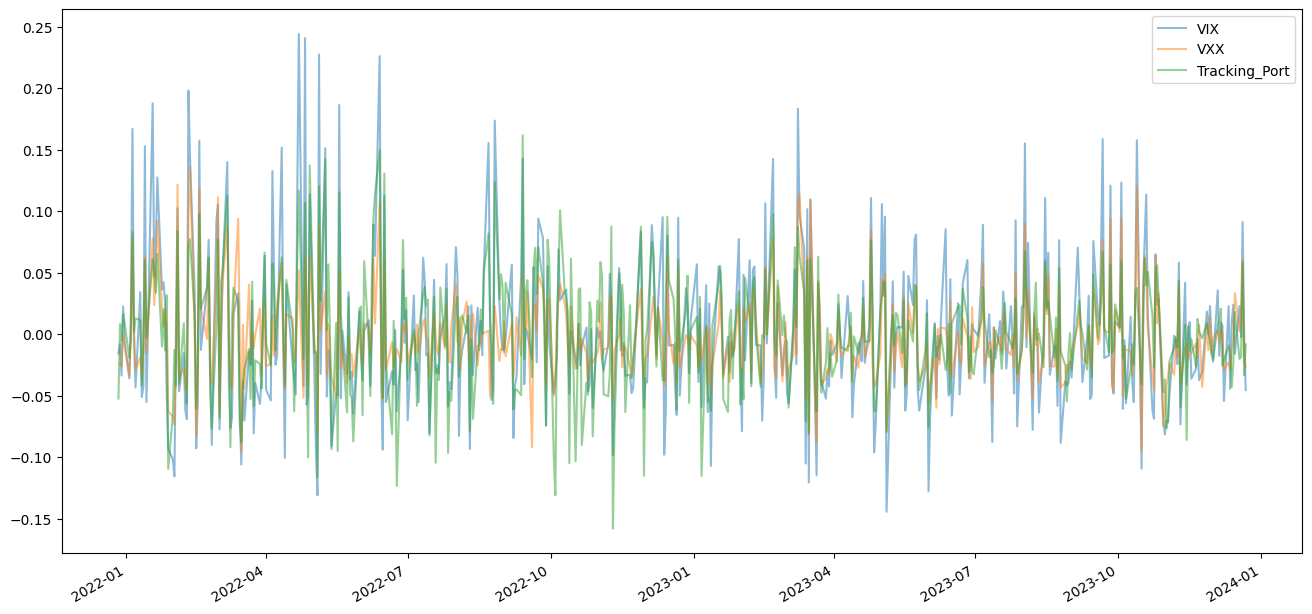

In [ ]:
plt.figure(figsize=(16,8))

vix_returns.plot(label='VIX', legend=True, alpha=0.5)
vxx_returns.plot(label='VXX', legend=True, alpha=0.5)
tracking_portfolio.plot(label='Tracking_Port', legend=True, alpha=0.5)

<br>
<font size="+1">
    <ul>
        <li>Not a complete success, but also not bad for a first attempt!</li>
        <br>
        <li>Definitely more work to do, but it appears we are on a good track.</li>
        <br>
        <font color="red"><li style="color:red">Do we need to think about different time samples, such as in-sample sets, out-of-sample sets, or a portfolio prescription formed on a daily basis?</li></font>
        <br>
    </ul>
</font>

In [ ]:
# As a reference point, consider the error between the S&P 500 Index (SPX) and a popular ETF that tracks the index (SPY)

spy = yf.download('SPY', start='1980-09-10', end=datetime.date.today())
spx = yf.download('^SPX', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
